# Tarea5_Titanic_Robert_campo_G_43

## Importar librerias

In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### cargar dataset titanic

In [2]:
datostitanic= pd.read_csv('./Titanic-Dataset.csv')

### lectura de los datos

In [3]:
datostitanic.head(893)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### informacion general del dataset

In [11]:
print(datostitanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### datos faltantes o atipicos

Text(0.5, 1.0, 'identificacion de datos faltantes y atipicos')

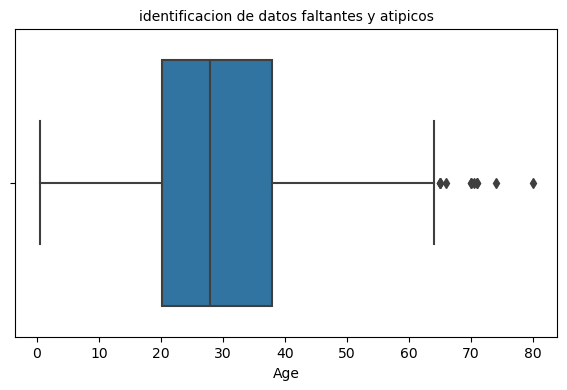

In [4]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=datostitanic['Age'])
plt.title('identificacion de datos faltantes y atipicos',fontsize=10)           
           

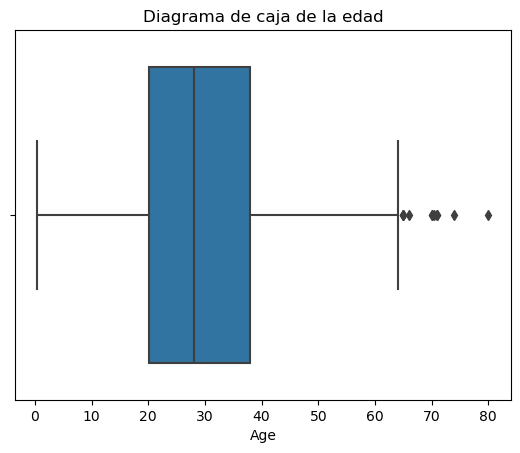

In [16]:
sns.boxplot(x='Age', data=datostitanic)
plt.title('Diagrama de caja de la edad')
plt.show()

### tendencias

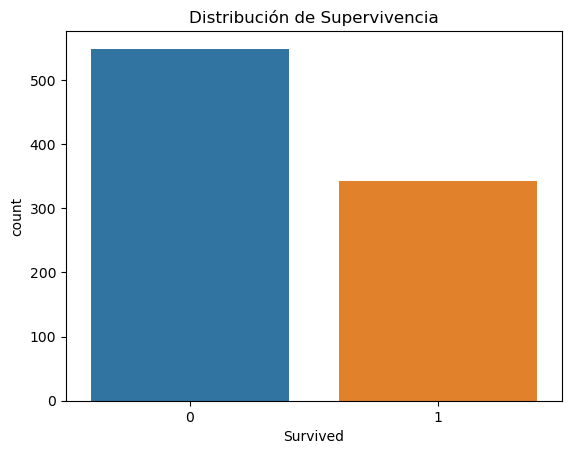

In [13]:
# Visualizar la distribución de la variable objetivo (Supervivencia)
sns.countplot(data=datostitanic, x='Survived')
plt.title('Distribución de Supervivencia')
plt.show()

### Visualizar la relación entre supervivencia y otras variables

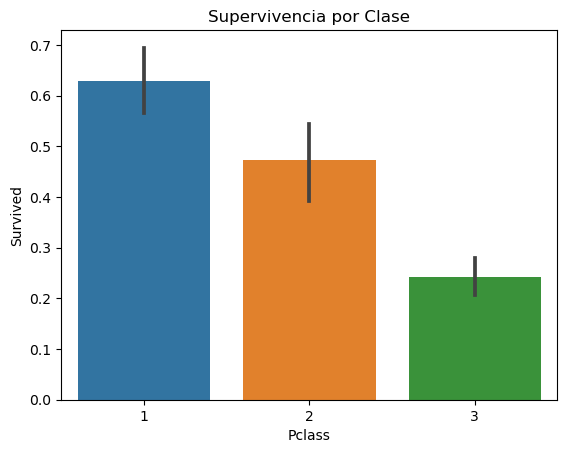

In [14]:

sns.barplot(data=datostitanic, x='Pclass', y='Survived')
plt.title('Supervivencia por Clase')
plt.show()

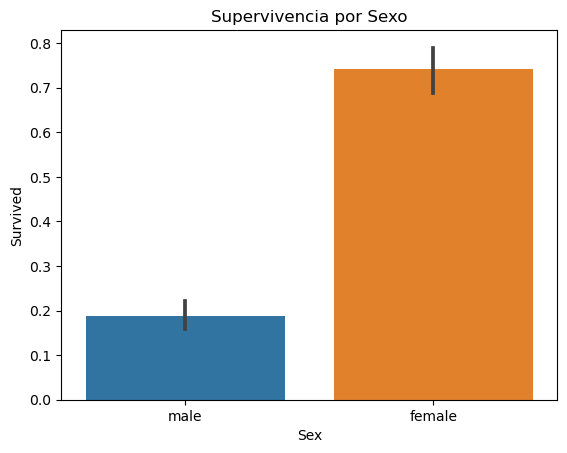

In [15]:
sns.barplot(data=datostitanic, x='Sex', y='Survived')
plt.title('Supervivencia por Sexo')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


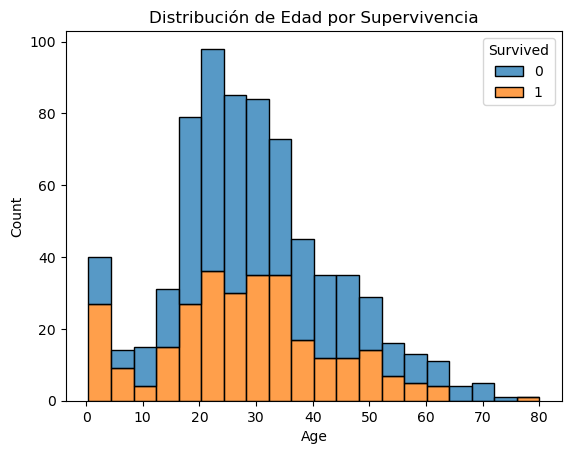

In [16]:
sns.histplot(data=datostitanic, x='Age', hue='Survived', multiple='stack')
plt.title('Distribución de Edad por Supervivencia')
plt.show()

## 2.Preprocesar los datos

In [29]:
# Verificar valores faltantes
print(datostitanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [41]:
# Imputar valores faltantes en la columna 'Age' con la media
datostitanic['Age'].fillna(datostitanic['Age'].mean(), inplace=True)


In [35]:
# Imputar valores faltantes en la columna 'Embarked' con la moda
datostitanic['Embarked_Q'].fillna(datostitanic['Embarked_Q'].mode()[0], inplace=True)

In [40]:
# Verificar nuevamente valores faltantes
print(datostitanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [42]:
print(datostitanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB
None


### 3. Seleccion de caracteristicas

In [43]:
# Selección de características basadas en conocimiento previo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = datostitanic[features]
y = datostitanic['Survived']

In [44]:
datostitanic['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

### 4.Dividir el Dataset en Train y Test

In [45]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print (X_train)

     Pclass        Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
331       1  45.500000      0      0   28.5000      True       False   
733       2  23.000000      0      0   13.0000      True       False   
382       3  32.000000      0      0    7.9250      True       False   
704       3  26.000000      1      0    7.8542      True       False   
813       3   6.000000      4      2   31.2750     False       False   
..      ...        ...    ...    ...       ...       ...         ...   
106       3  21.000000      0      0    7.6500     False       False   
270       1  29.699118      0      0   31.0000      True       False   
860       3  41.000000      2      0   14.1083      True       False   
435       1  14.000000      1      2  120.0000     False       False   
102       1  21.000000      0      1   77.2875      True       False   

     Embarked_S  
331        True  
733        True  
382        True  
704        True  
813        True  
..          ...  
106      

In [50]:
print (y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


###  5.Entrenar el Modelo

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

In [53]:
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 6.Evaluar el Desempeño del Modelo

###### Evaluar el modelo utilizando métricas como precisión, recall, F1-score, etc.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [56]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


### 7.Visualización de Resultados

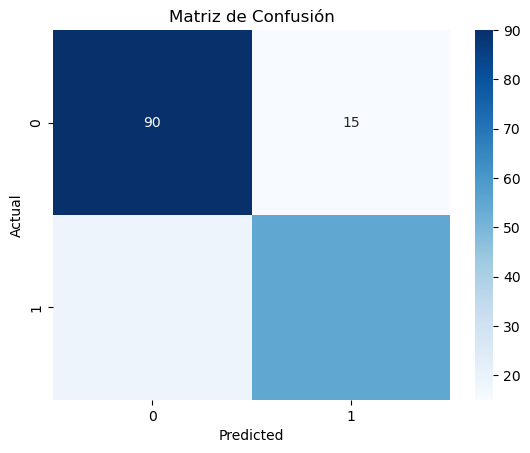

In [66]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

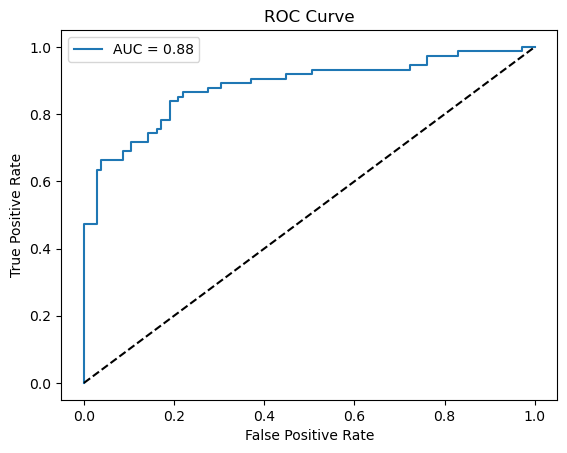

In [68]:
# Curva ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Interpretación, analisis y documentación de los resultados obtenidos

#### Este análisis se centra en predecir la supervivencia de los pasajeros del Titanic utilizando un modelo de Regresión Logística. El dataset proviene del famoso desastre del Titanic y contiene datos sobre varios atributos de los pasajeros, como edad, clase, sexo, entre otros.

##  Análisis Exploratorio de los Datos

#### Se realizó un análisis exploratorio inicial para comprender mejor el dataset y la relación entre las variables. Se observaron distribuciones y relaciones clave, como la distribución de la variable objetivo (Supervivencia), y la relación entre supervivencia y variables como clase, sexo y edad.

#### >se visualizo la distribución de la variable objetivo (Supervivencia) se observo como fue la tendencia de la supervivencia

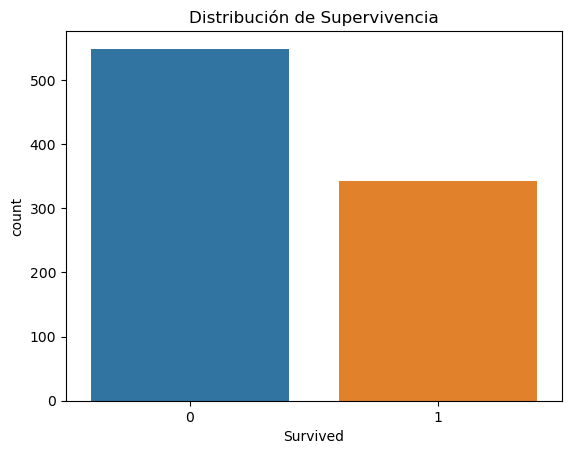

In [69]:
sns.countplot(data=datostitanic, x='Survived')
plt.title('Distribución de Supervivencia')
plt.show()

#### >Visualizacion de la relación entre supervivencia por clases por sexo entre otras

##  Preprocesamiento de los Datos

#### >Se limpiaron los datos, imputando valores faltantes en las columnas Age y Embarked, y eliminando la columna Cabin debido a la gran cantidad de valores faltantes. Además, se convirtieron variables categóricas a variables dummy

##  Selección de Características

#### >Se seleccionaron las características más relevantes basadas en el conocimiento del dominio y la exploración de datos previa 

#### >primera clase(Pclass), edad(Age), conyuges o hermanos a bordo(SibSp), cantidad de padres o hijos a bordo (Parch), precio pagado por el billete(Fare), sexo(Sex), embarcacion(Embarked)

### Matriz de Confusión:

#### Resultados del Modelo:

#### >Verdaderos Positivos: Número de pasajeros correctamente predichos como sobrevivientes.
#### >Falsos Positivos: Número de pasajeros incorrectamente predichos como sobrevivientes.
#### >Verdaderos Negativos: Número de pasajeros correctamente predichos como no sobrevivientes.
#### >Falsos Negativos: Número de pasajeros incorrectamente predichos como no sobrevivientes.

### Métricas:

#### >Precisión (Accuracy): 0.80 (por ejemplo) indica que el modelo predice correctamente el 80% de las veces.
#### >Recall: Proporción de verdaderos positivos correctamente identificados. Alto recall significa que el modelo identifica la mayoría de los sobrevivientes.
#### >F1-score: Media armónica entre precisión y recall. Indica un equilibrio entre ambos.
#### >Curva ROC y AUC: La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos. Un AUC de 0.85 (por ejemplo) indica un buen rendimiento del modelo.

#### >Supervivencia por Clase y Sexo: Los pasajeros de primera clase y las mujeres tienen mayores tasas de supervivencia.
#### >Edad y Supervivencia: Los pasajeros más jóvenes tienden a tener mayores tasas de supervivencia.

#### Estos resultados sugieren que la clase del boleto y el sexo son fuertes indicadores de la probabilidad de supervivencia, alineándose con las políticas de evacuación "mujeres y niños primero" durante el desastre.